<a href="https://colab.research.google.com/github/Hisernberg/linkdin-projects/blob/main/learning_albumentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## basic of albumentation

In [1]:
import albumentations as A
import cv2
from matplotlib import pyplot as plt

In [2]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(image)

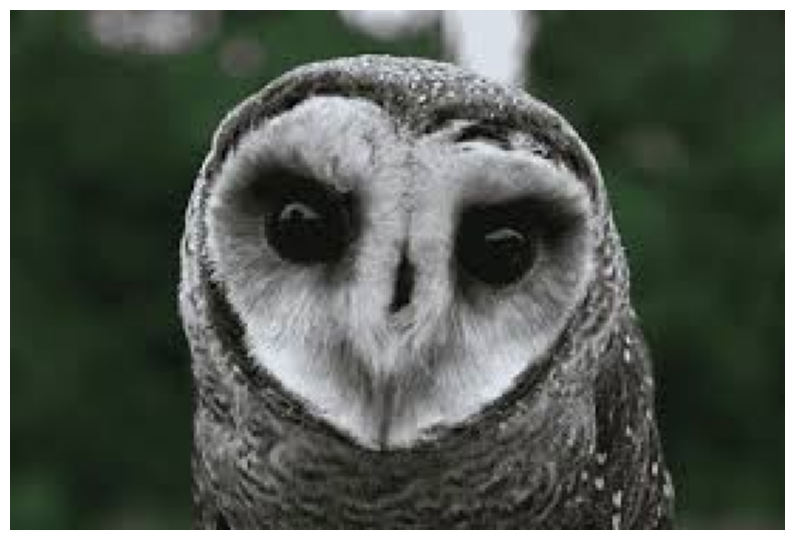

In [3]:
image = cv2.imread("/content/images.jpeg", cv2.IMREAD_COLOR_RGB)
visualize(image)

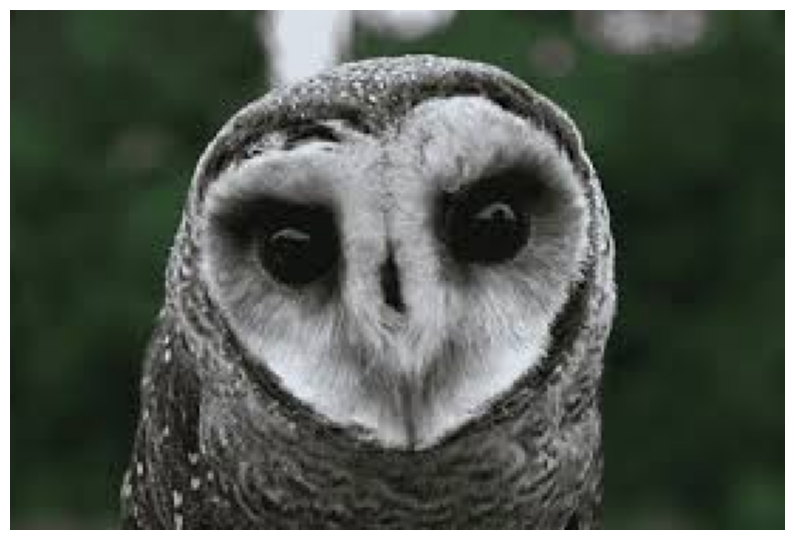

In [4]:
transform = A.HorizontalFlip(p=0.5)
transform.set_random_seed(137)

augmented_image = transform(image=image)["image"]
visualize(augmented_image)

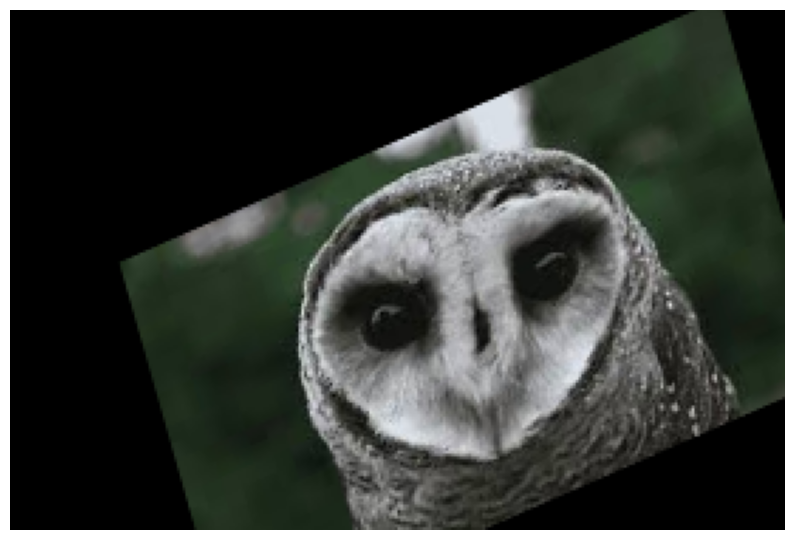

In [5]:
transform = A.Affine(p=0.5, scale=0.8, shear=5, translate_percent=0.1, rotate=20)
transform.set_random_seed(137)
augmented_image = transform(image=image)["image"]
visualize(augmented_image)

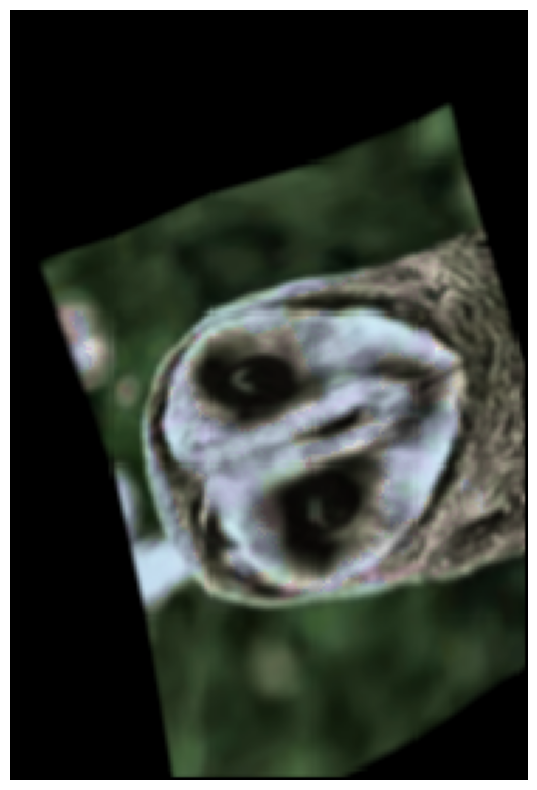

In [6]:
transform = A.Compose(
    [
        A.CLAHE(),
        A.RandomRotate90(),
        A.Transpose(),
        A.Affine(rotate=20, scale=0.8, shear=5, translate_percent=0.1, p=1),
        A.Blur(blur_limit=3),
        A.OpticalDistortion(),
        A.GridDistortion(),
        A.HueSaturationValue(),
    ],
    strict=True,
    seed=137,
)

augmented_image = transform(image=image)["image"]
visualize(augmented_image)

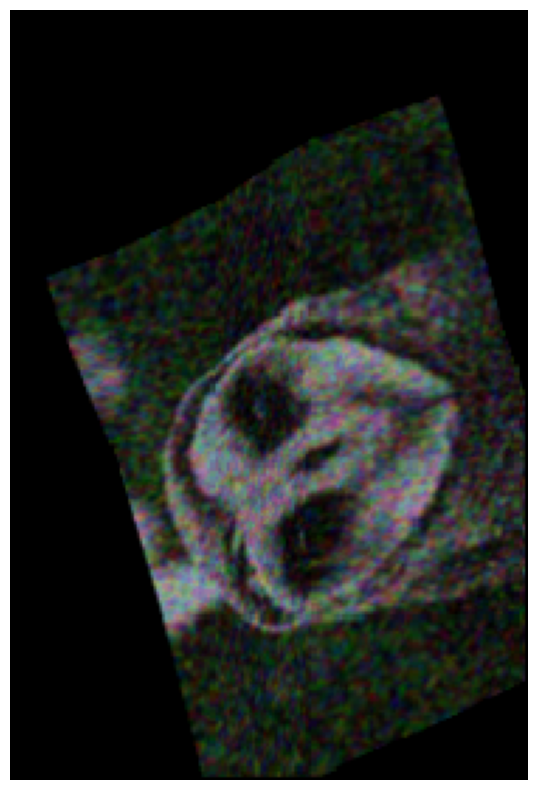

In [7]:
transform = A.Compose(
    [
        A.RandomRotate90(),
        A.Transpose(),
        A.GaussNoise(),
        A.OneOf(
            [
                A.MotionBlur(p=0.2),
                A.MedianBlur(blur_limit=3, p=0.1),
                A.Blur(blur_limit=3, p=0.1),
            ],
            p=0.2,
        ),
        A.Affine(rotate=20, scale=0.8, shear=5, translate_percent=0.1, p=0.2),
        A.OneOf(
            [
                A.OpticalDistortion(p=0.3),
                A.GridDistortion(p=0.1),
            ],
            p=0.2,
        ),
        A.OneOf(
            [
                A.CLAHE(clip_limit=2),
                A.RandomBrightnessContrast(),
            ],
            p=0.3,
        ),
        A.HueSaturationValue(p=0.3),
    ],
    strict=True,
    seed=137,
)

augmented_image = transform(image=image)["image"]
visualize(augmented_image)

### working with cifer10  dataset

In [12]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
print(f"Training images shape: {train_images.shape}")
print(f"Testing images shape: {test_images.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)


In [13]:
import numpy as np

augmented_images_list = []

for image in train_images:
    augmented_image = transform(image=image)["image"]
    augmented_images_list.append(augmented_image)

augmented_images = np.array(augmented_images_list)

print(f"Shape of the first augmented image: {augmented_images[0].shape}")
print(f"Shape of the augmented dataset: {augmented_images.shape}")

Shape of the first augmented image: (32, 32, 3)
Shape of the augmented dataset: (50000, 32, 32, 3)


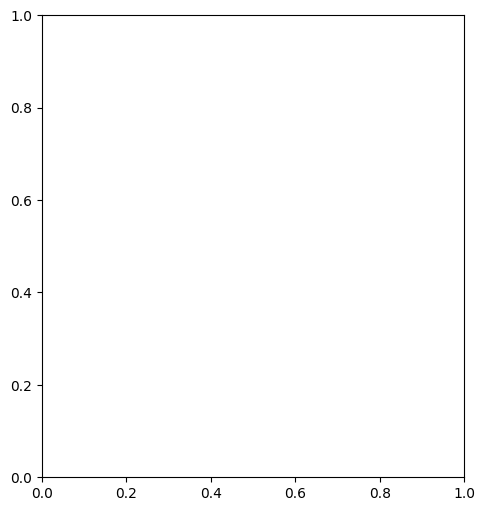

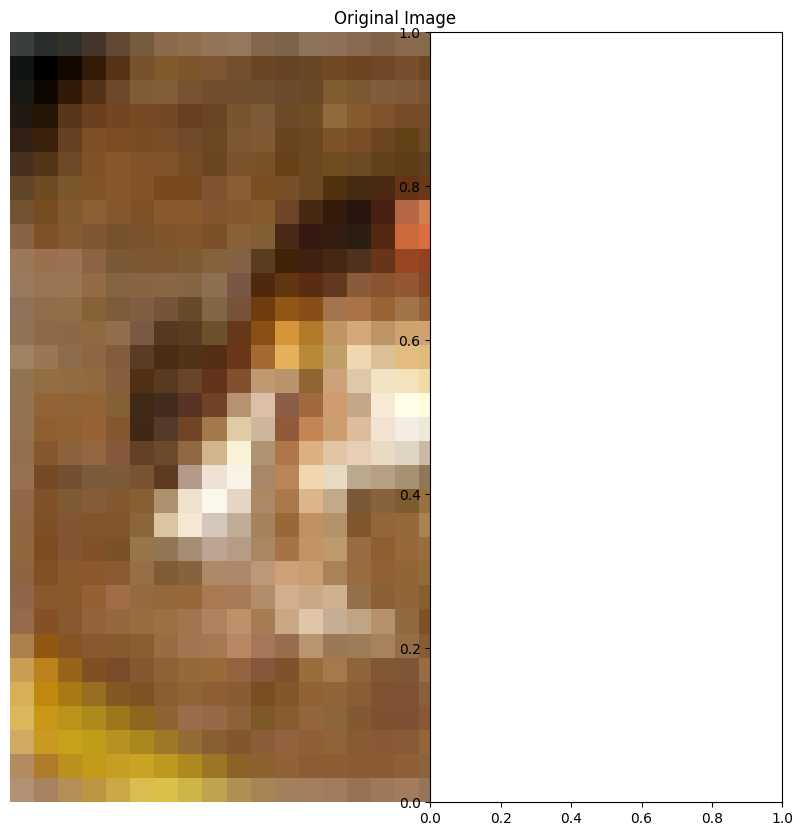

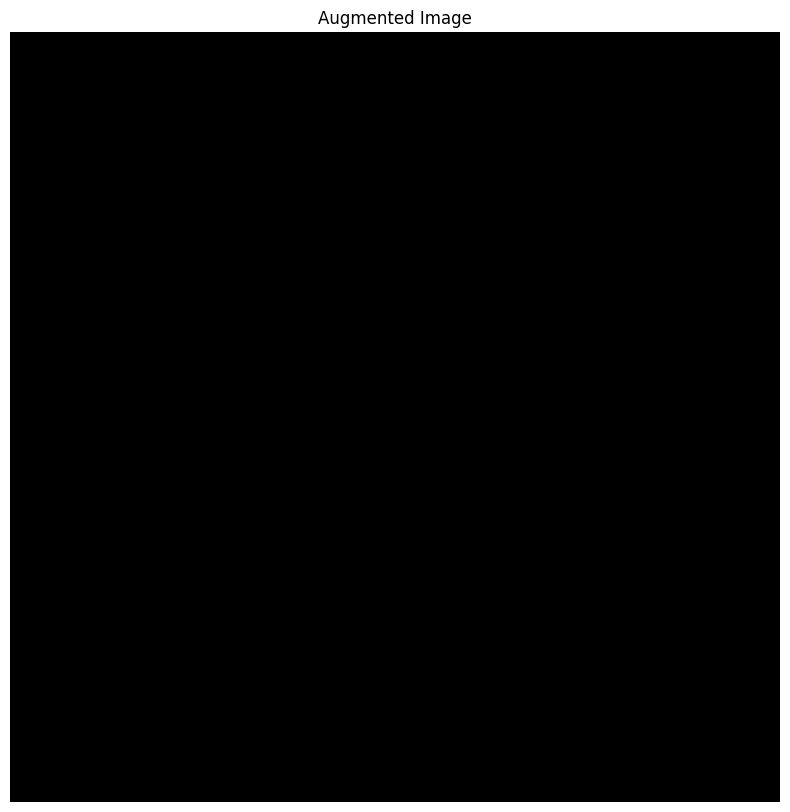

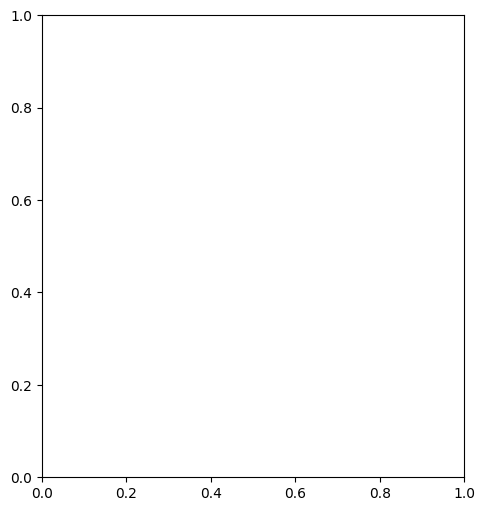

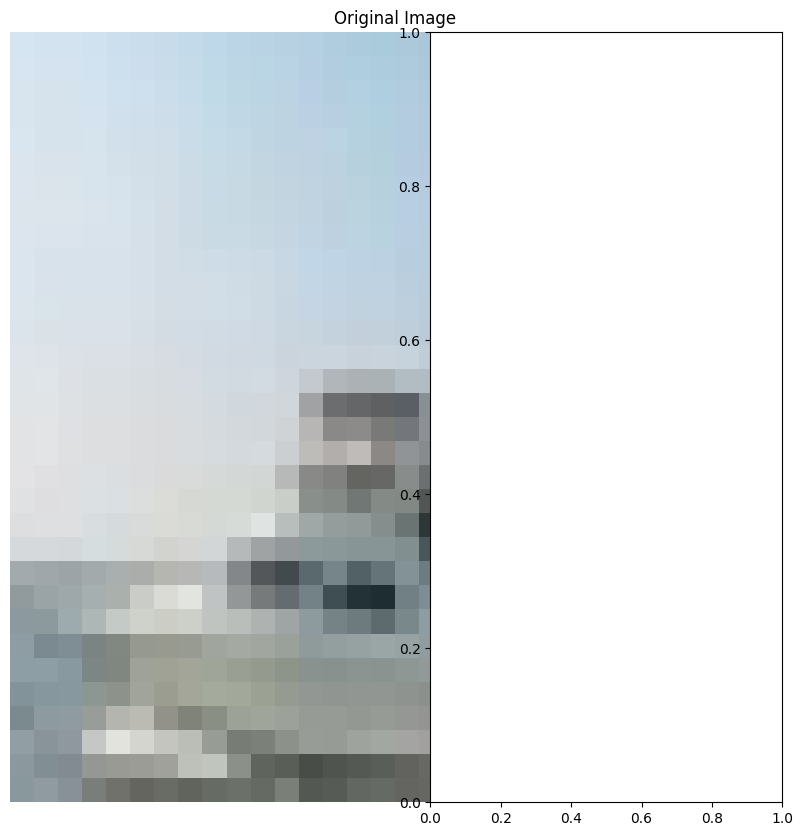

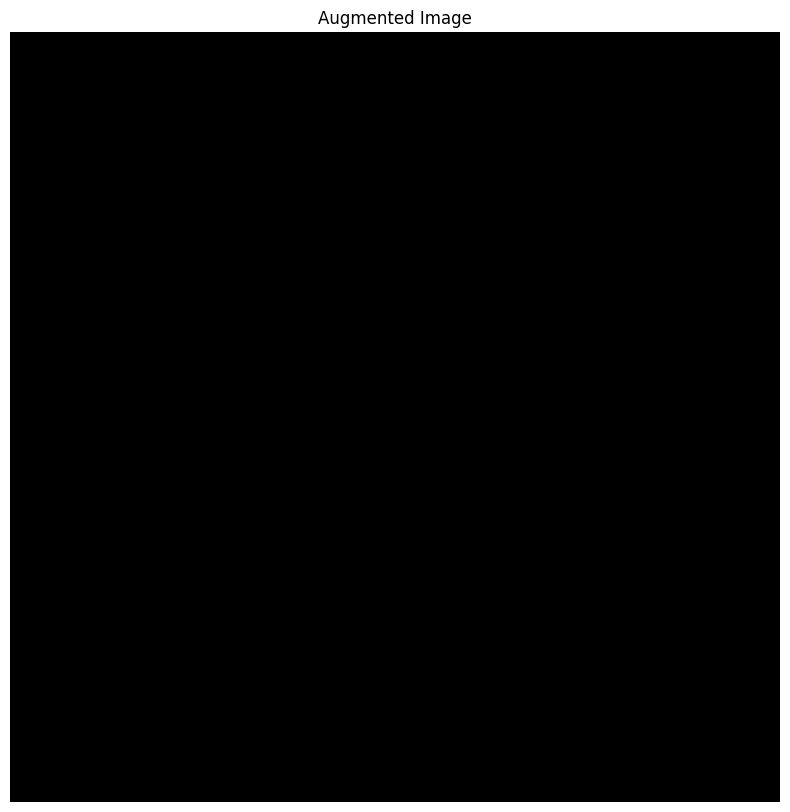

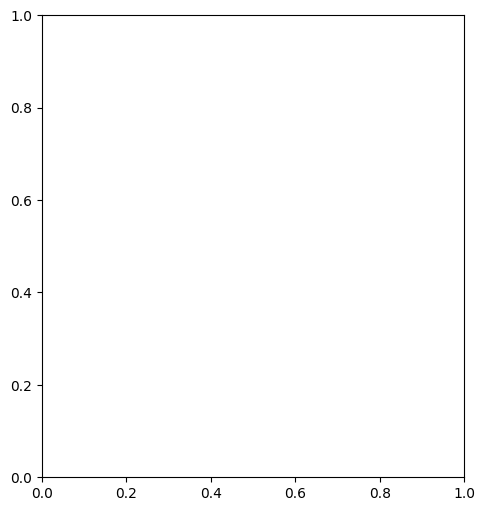

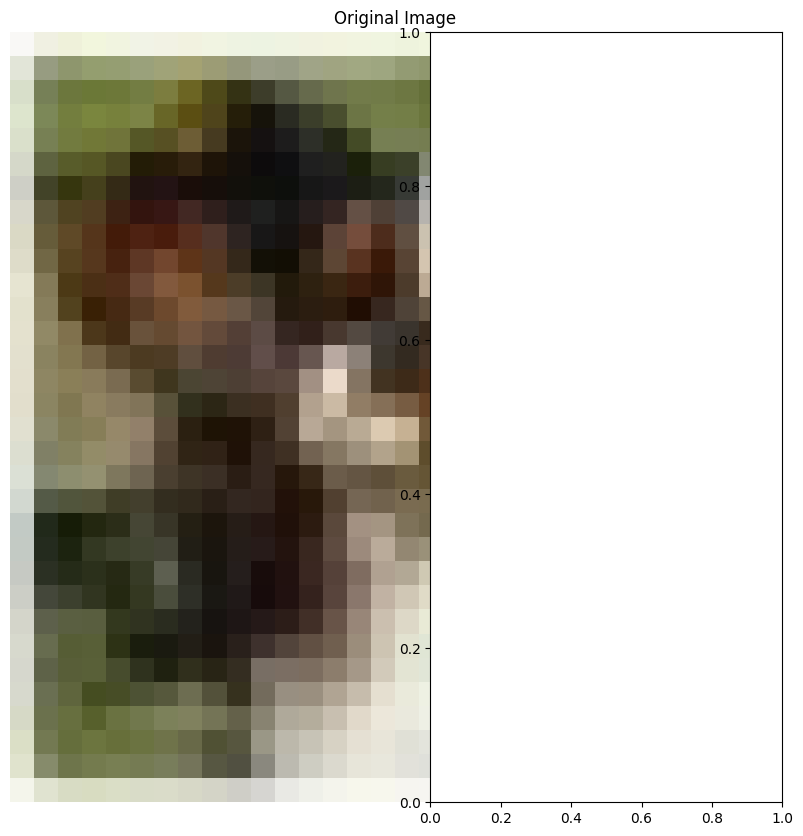

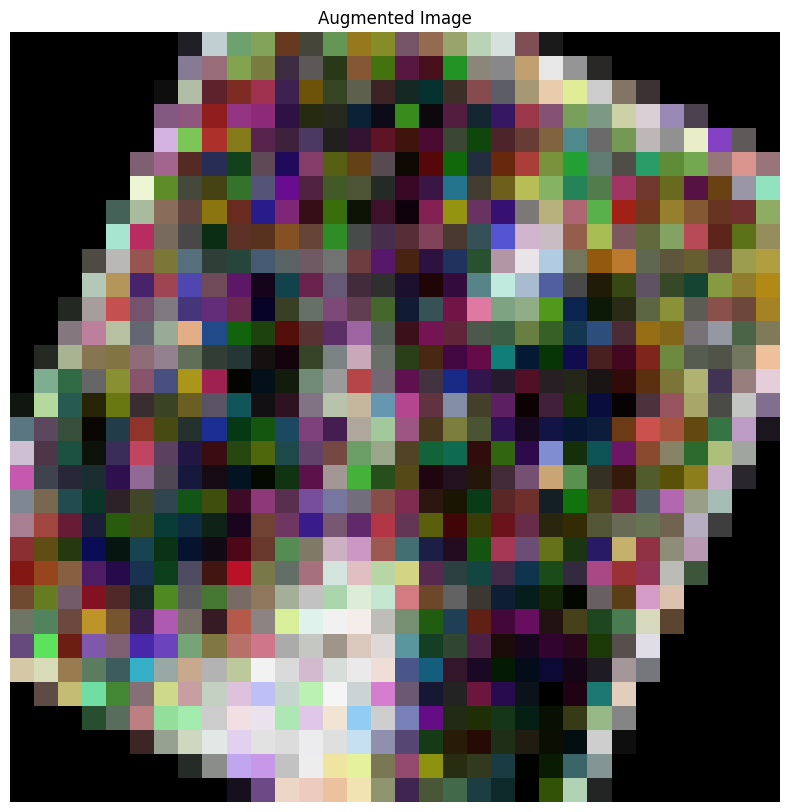

In [14]:
selected_indices = [0, 100, 500]

for index in selected_indices:
    original_image = train_images[index]
    augmented_image = augmented_images[index]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    visualize(original_image)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    visualize(augmented_image)
    plt.title("Augmented Image")

    plt.show()

In [15]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
augmented_test_images_list = []

for image in test_images:
    augmented_image = transform(image=image)["image"]
    augmented_test_images_list.append(augmented_image)

augmented_test_images = np.array(augmented_test_images_list)

history = model.fit(augmented_images, train_labels, epochs=10, validation_data=(augmented_test_images, test_labels))
test_loss, test_acc = model.evaluate(augmented_test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2139 - loss: 2.0582 - val_accuracy: 0.1827 - val_loss: 2.1676
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2275 - loss: 2.0369 - val_accuracy: 0.1871 - val_loss: 2.1706
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2268 - loss: 2.0291 - val_accuracy: 0.1792 - val_loss: 2.2219
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2396 - loss: 2.0053 - val_accuracy: 0.1891 - val_loss: 2.1957
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2511 - loss: 1.9729 - val_accuracy: 0.1871 - val_loss: 2.2268
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.2554 - loss: 1.9600 - val_accuracy: 0.1871 - val_loss: 2.2106
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2679 - loss: 1.9264 - val_accuracy: 0.1834 - val_loss: 2.2504
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2757 - loss: 1.91

In [18]:
history_original = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3457 - loss: 1.8193 - val_accuracy: 0.4058 - val_loss: 1.6294
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4336 - loss: 1.5641 - val_accuracy: 0.4480 - val_loss: 1.5247
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4739 - loss: 1.4491 - val_accuracy: 0.4785 - val_loss: 1.4754
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5070 - loss: 1.3664 - val_accuracy: 0.5122 - val_loss: 1.3823
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5358 - loss: 1.2881 - val_accuracy: 0.5280 - val_loss: 1.3696
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5575 - loss: 1.2326 - val_accuracy: 0.5368 - val_loss: 1.3372
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5870 - loss: 1.1535 - val_accuracy: 0.5298 - val_loss: 1.3866
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6043 - loss: 1.119

History for Model trained on Augmented Data:


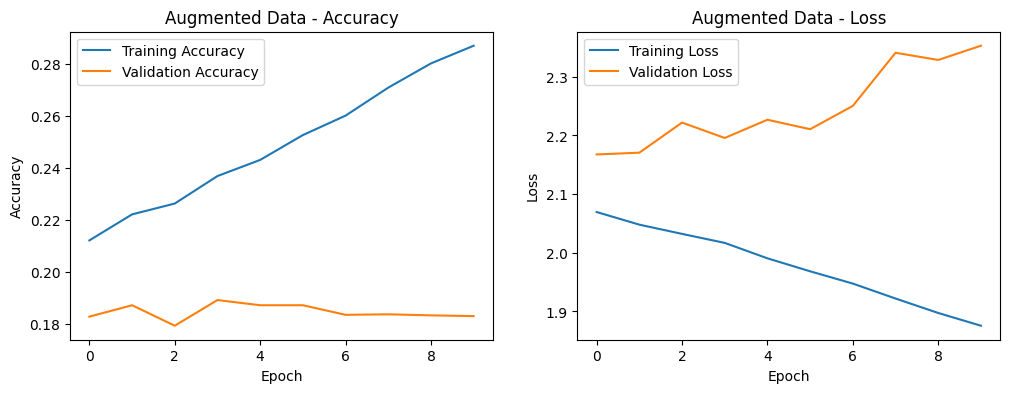


History for Model trained on Original Data:


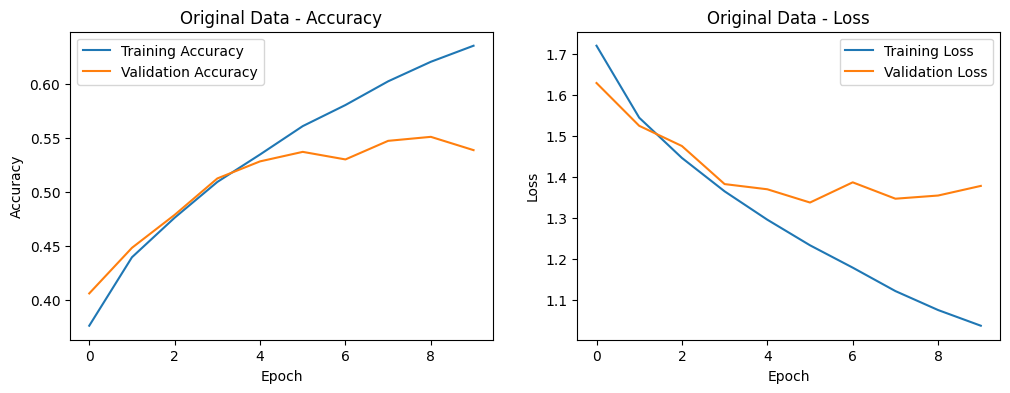

In [21]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

print("History for Model trained on Augmented Data:")
plot_history(history, "Augmented Data")

print("\nHistory for Model trained on Original Data:")
plot_history(history_original, "Original Data")

### comparison with other models

In [22]:
model_new = models.Sequential()
model_new.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_new.add(layers.BatchNormalization())
model_new.add(layers.MaxPooling2D((2, 2)))
model_new.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_new.add(layers.BatchNormalization())
model_new.add(layers.MaxPooling2D((2, 2)))
model_new.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_new.add(layers.BatchNormalization())
model_new.add(layers.Flatten())
model_new.add(layers.Dense(128, activation='relu'))
model_new.add(layers.Dropout(0.5))
model_new.add(layers.Dense(10))

model_new.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_new.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
history_new = model_new.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3743 - loss: 1.9696 - val_accuracy: 0.5529 - val_loss: 1.2513
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5905 - loss: 1.1731 - val_accuracy: 0.5102 - val_loss: 1.3558
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6537 - loss: 0.9984 - val_accuracy: 0.5875 - val_loss: 1.2000
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6940 - loss: 0.8790 - val_accuracy: 0.6535 - val_loss: 1.0041
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7244 - loss: 0.7976 - val_accuracy: 0.7162 - val_loss: 0.8136
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7516 - loss: 0.7154 - val_accuracy: 0.6980 - val_loss: 0.8861
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7711 - loss: 0.6538 - val_accuracy: 0.7143 - val_loss: 0.8459
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7876 - loss: 0.60

In [24]:
history_new_augmented = model_new.fit(augmented_images, train_labels, epochs=10, validation_data=(augmented_test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1657 - loss: 2.2737 - val_accuracy: 0.2076 - val_loss: 2.0900
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2024 - loss: 2.1046 - val_accuracy: 0.1909 - val_loss: 2.3479
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2188 - loss: 2.0658 - val_accuracy: 0.2287 - val_loss: 2.0398
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2355 - loss: 2.0151 - val_accuracy: 0.2250 - val_loss: 2.0677
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2530 - loss: 1.9798 - val_accuracy: 0.2332 - val_loss: 2.0657
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2577 - loss: 1.9527 - val_accuracy: 0.2387 - val_loss: 2.0384
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2720 - loss: 1.9096 - val_accuracy: 0.2442 - val_loss: 2.0174
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2913 - loss: 1.8664

In [25]:

loss_original, accuracy_original = model.evaluate(test_images, test_labels, verbose=0)
print(f"Original Model on Original Data - Test Loss: {loss_original:.4f}, Test Accuracy: {accuracy_original:.4f}")


loss_original_augmented, accuracy_original_augmented = model.evaluate(augmented_test_images, test_labels, verbose=0)
print(f"Original Model on Augmented Data - Test Loss: {loss_original_augmented:.4f}, Test Accuracy: {accuracy_original_augmented:.4f}")


loss_new, accuracy_new = model_new.evaluate(test_images, test_labels, verbose=0)
print(f"New Model on Original Data - Test Loss: {loss_new:.4f}, Test Accuracy: {accuracy_new:.4f}")


loss_new_augmented, accuracy_new_augmented = model_new.evaluate(augmented_test_images, test_labels, verbose=0)
print(f"New Model on Augmented Data - Test Loss: {loss_new_augmented:.4f}, Test Accuracy: {accuracy_new_augmented:.4f}")

Original Model on Original Data - Test Loss: 1.3779, Test Accuracy: 0.5384
Original Model on Augmented Data - Test Loss: 3.6583, Test Accuracy: 0.1614
New Model on Original Data - Test Loss: 1.3068, Test Accuracy: 0.5890
New Model on Augmented Data - Test Loss: 2.0370, Test Accuracy: 0.2518


**Reasoning**:
Visualize the training history of the new model on both original and augmented data to compare their performance during training.


History for New Model trained on Original Data:


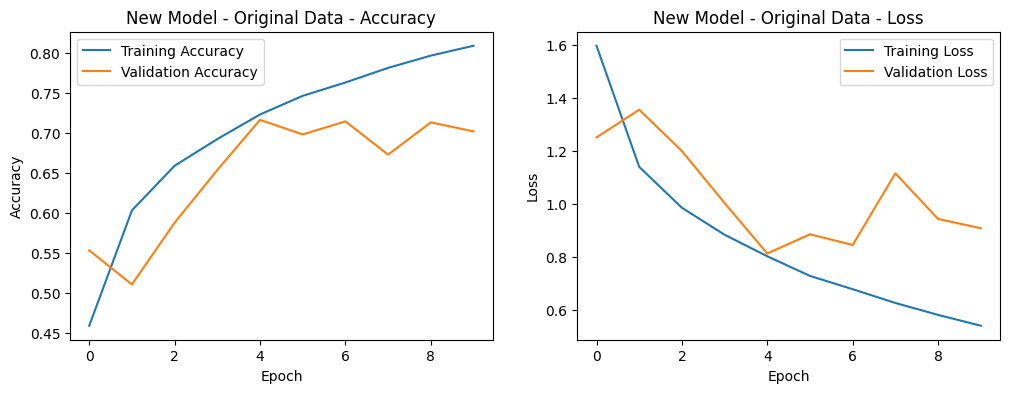


History for New Model trained on Augmented Data:


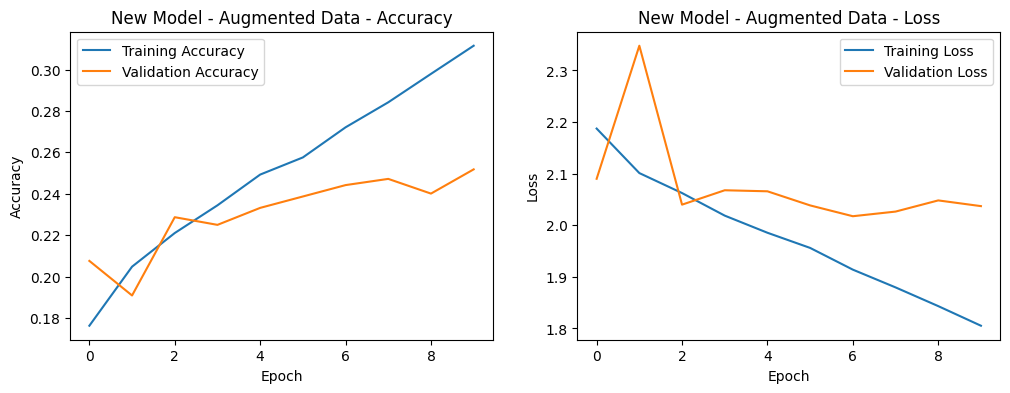

In [26]:
print("\nHistory for New Model trained on Original Data:")
plot_history(history_new, "New Model - Original Data")

print("\nHistory for New Model trained on Augmented Data:")
plot_history(history_new_augmented, "New Model - Augmented Data")